In [3]:
import pandas as pd
import numpy as np 
import sklearn 
import tensorflow as tf 

In [ ]:
train_data = pd.read_csv(r"C:\Users\Acer\Downloads\Arabic Handwritten Characters Dataset CSV\Dataset\csvTrainImages 13440x1024.csv")
train_labels = pd.read_csv(r"C:\Users\Acer\Downloads\Arabic Handwritten Characters Dataset CSV\Dataset\csvTrainLabel 13440x1.csv")
test_data = pd.read_csv(r"C:\Users\Acer\Downloads\Arabic Handwritten Characters Dataset CSV\Dataset\csvTestImages 3360x1024.csv")
test_labels = pd.read_csv(r"C:\Users\Acer\Downloads\Arabic Handwritten Characters Dataset CSV\Dataset\csvTestLabel 3360x1.csv")

In [5]:
# Convert to NumPy arrays
X_train = train_data.values
y_train = train_labels.values.ravel()

X_test = test_data.values
y_test = test_labels.values.ravel()

# Reshape into 32x32 grayscale images
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [6]:
y_train = y_train - 1
y_test = y_test - 1

In [7]:
from tensorflow.keras import layers, models


In [8]:
Basicmodel = models.Sequential([
                layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
                layers.MaxPooling2D((3, 3)),
                layers.Flatten(),
                layers.Dense(128, activation='relu'),
                layers.Dense(28, activation='softmax')
            ])

c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
Basicmodel.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [10]:
history = Basicmodel.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4570 - loss: 1.8082 - val_accuracy: 0.6454 - val_loss: 1.1080
Epoch 2/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7240 - loss: 0.8484 - val_accuracy: 0.7592 - val_loss: 0.7247
Epoch 3/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8087 - loss: 0.5705 - val_accuracy: 0.7913 - val_loss: 0.6310
Epoch 4/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8628 - loss: 0.4206 - val_accuracy: 0.8190 - val_loss: 0.5322
Epoch 5/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8914 - loss: 0.3264 - val_accuracy: 0.8273 - val_loss: 0.5053
Epoch 6/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9155 - loss: 0.2596 - val_accuracy: 0.8473 - val_loss: 0.4702
Epoch 7/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9286 - loss: 0.2195 - val_accuracy: 0.8354 - val_loss: 0.5245
Epoch 8/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9464 - loss: 0.1697 - val_accurac

In [11]:
from sklearn.metrics import classification_report

y_pred = Basicmodel.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred_classes))


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       119
           1       0.90      0.95      0.92       120
           2       0.77      0.77      0.77       120
           3       0.82      0.80      0.81       120
           4       0.90      0.87      0.88       120
           5       0.79      0.88      0.83       120
           6       0.84      0.89      0.87       120
           7       0.90      0.85      0.88       120
           8       0.84      0.85      0.85       120
           9       0.85      0.96      0.90       120
          10       0.94      0.84      0.89       120
          11       0.85      0.91      0.88       120
          12       0.95      0.95      0.95       120
          13       0.88      0.88      0.88       120
          14       0.94      0.84      0.89       120
          15       0.90      0.92      0.91       120
          16       0.92      0.88      0

In [12]:
from tensorflow.keras.layers import Dropout

Firstmodel = models.Sequential([
                layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.Flatten(),
                layers.Dense(256, activation='relu'),
                layers.Dropout(0.3),
                layers.Dense(28, activation='softmax')
            ])

c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
Firstmodel.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = Firstmodel.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.4364 - loss: 1.8217 - val_accuracy: 0.7526 - val_loss: 0.8055
Epoch 2/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7341 - loss: 0.8082 - val_accuracy: 0.8565 - val_loss: 0.4929
Epoch 3/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8152 - loss: 0.5503 - val_accuracy: 0.8884 - val_loss: 0.3672
Epoch 4/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8507 - loss: 0.4399 - val_accuracy: 0.9080 - val_loss: 0.3071
Epoch 5/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8808 - loss: 0.3529 - val_accuracy: 0.9029 - val_loss: 0.3168
Epoch 6/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8975 - loss: 0.3054 - val_accuracy: 0.9190 - val_loss: 0.2655
Epoch 7/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9103 - loss: 0.2628 - val_accuracy: 0.9271 - val_loss: 0.2578
Epoch 8/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9191 - loss: 0.2358 - val_acc

In [14]:
from sklearn.metrics import classification_report

y_pred = Firstmodel.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred_classes))


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       0.97      0.98      0.98       120
           2       0.83      0.95      0.89       120
           3       0.95      0.80      0.87       120
           4       0.96      0.93      0.94       120
           5       0.90      0.94      0.92       120
           6       0.96      0.93      0.95       120
           7       0.91      0.95      0.93       120
           8       0.96      0.89      0.92       120
           9       0.89      0.99      0.94       120
          10       0.94      0.92      0.93       120
          11       0.99      0.97      0.98       120
          12       0.94      0.98      0.96       120
          13       0.93      0.97      0.95       120
          14       0.96      0.92      0.94       120
          15       0.93      0.97      0.95       120
          16       0.95      0.93      0

In [16]:
FinalmodelV1 = models.Sequential([
                layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Flatten(),
                layers.Dense(256, activation='relu'),
                layers.Dropout(0.3),
                layers.BatchNormalization(),
                layers.Dense(28, activation='softmax')
            ])

c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
FinalmodelV1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = FinalmodelV1.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.4793 - loss: 1.7368 - val_accuracy: 0.0646 - val_loss: 6.7179
Epoch 2/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7617 - loss: 0.7558 - val_accuracy: 0.7767 - val_loss: 0.7301
Epoch 3/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8327 - loss: 0.5303 - val_accuracy: 0.8622 - val_loss: 0.4585
Epoch 4/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8699 - loss: 0.4180 - val_accuracy: 0.8994 - val_loss: 0.3426
Epoch 5/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8859 - loss: 0.3470 - val_accuracy: 0.9202 - val_loss: 0.2663
Epoch 6/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9051 - loss: 0.2964 - val_accuracy: 0.9247 - val_loss: 0.2531
Epoch 7/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9113 - loss: 0.2692 - val_accuracy: 0.9172 - val_loss: 0.2503
Epoch 8/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9190 - loss: 0.2484 - val_acc

In [18]:
from sklearn.metrics import classification_report

y_pred = Firstmodel.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred_classes))


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       0.97      0.98      0.98       120
           2       0.83      0.95      0.89       120
           3       0.95      0.80      0.87       120
           4       0.96      0.93      0.94       120
           5       0.90      0.94      0.92       120
           6       0.96      0.93      0.95       120
           7       0.91      0.95      0.93       120
           8       0.96      0.89      0.92       120
           9       0.89      0.99      0.94       120
          10       0.94      0.92      0.93       120
          11       0.99      0.97      0.98       120
          12       0.94      0.98      0.96       120
          13       0.93      0.97      0.95       120
          14       0.96      0.92      0.94       120
          15       0.93      0.97      0.95       120
          16       0.95      0.93      0

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import swish
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.layers import BatchNormalization, PReLU
from tensorflow.keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train)

Lastmodel = models.Sequential([
                layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 1)),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Conv2D(64, (3, 3)),
                layers.PReLU(),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Conv2D(128, (3, 3)),
                layers.PReLU(),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Flatten(),
                layers.Dense(256),
                layers.PReLU(),
                layers.BatchNormalization(),
                layers.Dropout(0.2),
                layers.Dense(128),
                layers.LeakyReLU(),
                layers.BatchNormalization(),
                layers.Dropout(0.2),
                layers.Dense(28, activation='softmax')
            ])

Lastmodel.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = Lastmodel.fit(datagen.flow(X_train, y_train, batch_size=64),
                        epochs=30, validation_data=(X_test, y_test),
                        callbacks=[es])

Lastmodel.summary()


Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.2358 - loss: 2.6196 - val_accuracy: 0.0360 - val_loss: 5.7630
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5007 - loss: 1.5114 - val_accuracy: 0.2158 - val_loss: 2.4616
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6402 - loss: 1.0654 - val_accuracy: 0.6773 - val_loss: 0.8471
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7121 - loss: 0.8508 - val_accuracy: 0.8449 - val_loss: 0.4369
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7587 - loss: 0.7272 - val_accuracy: 0.8866 - val_loss: 0.3494
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7949 - loss: 0.6178 - val_accuracy: 0.6002 - val_loss: 1.2309
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8126 - loss: 0.5628 - val_accuracy: 0.8973 - val_loss: 0.2821
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8263 - loss: 0.5196 - val_acc

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_10 (PReLU)              │ (None, 13, 13, 64)     │        10,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_11 (PReLU)              │ (None, 4, 4, 128)      │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_12 (PReLU)              │ (None, 256)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 825,750 (3.15 MB)

 Trainable params: 274,844 (1.05 MB)

 Non-trainable params: 1,216 (4.75 KB)

 Optimizer params: 549,690 (2.10 MB)

In [46]:
from sklearn.metrics import classification_report

y_pred = Lastmodel.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred_classes))


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       0.98      0.99      0.99       120
           2       0.89      0.99      0.94       120
           3       0.99      0.93      0.96       120
           4       0.95      0.99      0.97       120
           5       0.97      0.94      0.96       120
           6       0.95      0.98      0.97       120
           7       0.96      0.97      0.97       120
           8       0.94      0.95      0.95       120
           9       0.94      0.97      0.96       120
          10       0.98      0.92      0.95       120
          11       0.99      1.00      1.00       120
          12       0.98      1.00      0.99       120
          13       0.95      0.99      0.97       120
          14       0.99      0.96      0.97       120
          15       0.97      0.94      0.95       120
          16       0.95      0.97      

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import swish
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.layers import BatchNormalization, PReLU
from tensorflow.keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train)

LastmodelV2 = models.Sequential([
                layers.Conv2D(32, (3, 3),input_shape=(32, 32, 1)),
                layers.PReLU(),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Conv2D(64, (3, 3)),
                layers.PReLU(),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Conv2D(128, (3, 3)),
                layers.PReLU(),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Conv2D(256, (3,3), padding='same'),
                layers.PReLU(),
                layers.MaxPooling2D((2,2)),
                layers.Dropout(0.25),
                layers.BatchNormalization(),
                layers.Flatten(),
                layers.Dense(512),
                layers.PReLU(),
                layers.BatchNormalization(),
                layers.Dropout(0.2),
                layers.Dense(128),
                layers.LeakyReLU(),
                layers.BatchNormalization(),
                layers.Dropout(0.2),
                layers.Dense(28),
                layers.LeakyReLU(),
                layers.BatchNormalization(),
                layers.Dropout(0.2),
                layers.Dense(28, activation='softmax')
            ])

LastmodelV2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = LastmodelV2.fit(datagen.flow(X_train, y_train, batch_size=64),
                        epochs=30, validation_data=(X_test, y_test),
                        callbacks=[es])

LastmodelV2.summary()


c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


c:\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


210/210 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.1760 - loss: 2.8289 - val_accuracy: 0.0357 - val_loss: 4.8287
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 29s 137ms/step - accuracy: 0.3644 - loss: 1.8960 - val_accuracy: 0.1075 - val_loss: 3.5195
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.5462 - loss: 1.3704 - val_accuracy: 0.6529 - val_loss: 1.0208
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 36s 171ms/step - accuracy: 0.6572 - loss: 1.0422 - val_accuracy: 0.8687 - val_loss: 0.4094
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.7276 - loss: 0.8319 - val_accuracy: 0.8976 - val_loss: 0.3026
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 43s 204ms/step - accuracy: 0.7693 - loss: 0.7052 - val_accuracy: 0.9029 - val_loss: 0.2703
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 43s 202ms/step - accuracy: 0.8007 - loss: 0.6252 - val_accuracy: 0.9238 - val_loss: 0.2260
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.8135 - loss: 0.5811 - val_ac

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_27 (PReLU)              │ (None, 30, 30, 32)     │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_28 (PReLU)              │ (None, 13, 13, 64)     │        10,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_29 (PReLU)              │ (None, 4, 4, 128)      │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_30 (PReLU)              │ (None, 2, 2, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_31 (PReLU)              │ (None, 512)            │           51

 Total params: 1,907,322 (7.28 MB)

 Trainable params: 635,008 (2.42 MB)

 Non-trainable params: 2,296 (8.97 KB)

 Optimizer params: 1,270,018 (4.84 MB)

In [58]:
from sklearn.metrics import classification_report

y_pred = LastmodelV2.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred_classes))

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       1.00      0.98      0.99       120
           2       0.93      0.97      0.95       120
           3       0.97      0.98      0.98       120
           4       0.98      0.99      0.98       120
           5       0.97      0.97      0.97       120
           6       1.00      0.98      0.99       120
           7       0.94      0.98      0.96       120
           8       0.93      0.95      0.94       120
           9       0.95      0.96      0.95       120
          10       0.99      0.90      0.94       120
          11       0.99      1.00      1.00       120
          12       0.99      0.99      0.99       120
          13       0.98      0.98      0.98       120
          14       0.99      0.97      0.98       120
          15       0.97      0.99      0.98       120
          16       0.99      0.97      

In [59]:
LastmodelV2.save("LastmodelV2.keras")


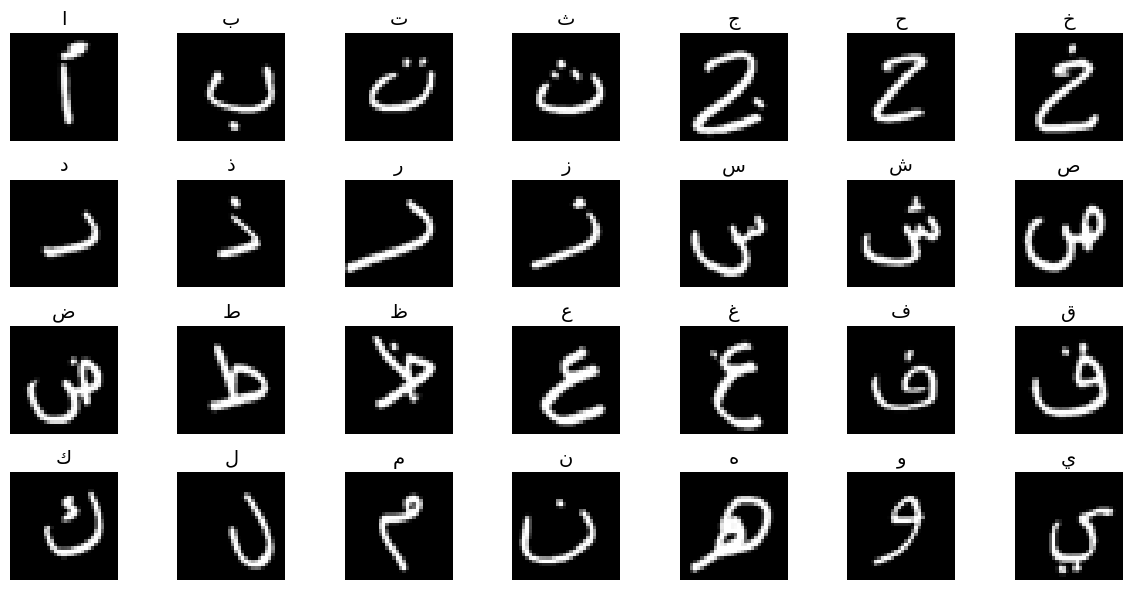

In [70]:
import matplotlib.pyplot as plt
arabic_letters = [
    "ا", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز",
    "س", "ش", "ص", "ض", "ط", "ظ", "ع", "غ", "ف", "ق",
    "ك", "ل", "م", "ن", "ه", "و", "ي"
]

plt.figure(figsize=(12, 6))

for i in range(28):
    plt.subplot(4, 7, i + 1)
    idx = np.where(y_train == i)[0][0]
    
    # Reshape to 32x32 image
    img = X_train[idx].reshape(32, 32)
    
    # 🔹 Apply both transformations
    # First rotate 90° (counterclockwise), then flip vertically
    transformed_img = np.flipud(np.rot90(img))
    
    plt.imshow(transformed_img, cmap='gray')
    plt.title(arabic_letters[i], fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()
